In [1]:
import json
import requests
import pandas as pd
import seaborn as sns
import pytz

from matplotlib import pyplot as plt
from datetime import datetime, timedelta, date, time
from snscrape.modules.twitter import TwitterSearchScraper as tss

In [2]:
def get_tweets(tag, limit=10000):
    search = tss(query=f"{tag} lang:pt")
    results = []
    for i, result in enumerate(search.get_items(), start=1):
        if i > limit:
            return results
        results.append(json.loads(result.json()))

In [3]:
json_teste = get_tweets("copa")

In [4]:
data = {
        'username': [],
        'original': [],
        'verified': [],
        'tweet_date': [],
        }

In [5]:
for n in json_teste:
    #preprocessed_tweet = [stemmer.stem(str(palavra)) for palavra in n['content'].split(' ') if palavra]
    data['original'].append(n['content'])    
    #data['tweet'].append(' '.join(preprocessed_tweet))
    data['verified'].append(n['user']['verified'])  
    data['username'].append(n['user']['username'])  
    data['tweet_date'].append(n['date'])

In [6]:
df_hour = pd.DataFrame(data)

In [7]:
display(df_hour)

,username,original,verified,tweet_date
0,SportRaiz,@camilac_alves Final da Copa e tira teima fina...,False,2022-11-19T18:41:21+00:00
1,goldoneves,minha expectativa pré copa do mundo começou a ...,False,2022-11-19T18:41:20+00:00
2,pessicolorado,É praticamente o Bayern disputando uma Copa do...,False,2022-11-19T18:41:19+00:00
3,CamileVieira7,ta mas é essa a música da copa?!!,False,2022-11-19T18:41:17+00:00
4,sucamss,"a bruxa ta solta na seleção francesa, vai ser ...",False,2022-11-19T18:41:16+00:00
...,...,...,...,...
9995,leo_baiao,Essa Copa tá parecendo um velório.,False,2022-11-19T16:51:03+00:00
9996,borbamand,"eu nao quero mais saber de tristeza, amanhã te...",False,2022-11-19T16:51:02+00:00
9997,portilho_bia,ansiosa pra começar a decorar a casa pra natal...,False,2022-11-19T16:51:01+00:00
9998,ponyoesosuke,minha ficha só vai cair amanhã qnd eu ver o ju...,False,2022-11-19T16:51:01+00:00


In [8]:
df_hour.dtypes

username      object
original      object
verified        bool
tweet_date    object
dtype: object

In [9]:
df_hour['tweet_date'] = pd.to_datetime(df_hour['tweet_date'])
df_hour['tweet_date'] = df_hour.tweet_date.dt.tz_convert('Brazil/East')

In [10]:
df_hour.dtypes

username                           object
original                           object
verified                             bool
tweet_date    datetime64[ns, Brazil/East]
dtype: object

In [11]:
df_hour['tweet_hour'] = df_hour['tweet_date'].dt.hour
df_hour['tweet_day'] = df_hour['tweet_date'].dt.date

In [12]:
display(df_hour)

,username,original,verified,tweet_date,tweet_hour,tweet_day
0,SportRaiz,@camilac_alves Final da Copa e tira teima fina...,False,2022-11-19 15:41:21-03:00,15,2022-11-19
1,goldoneves,minha expectativa pré copa do mundo começou a ...,False,2022-11-19 15:41:20-03:00,15,2022-11-19
2,pessicolorado,É praticamente o Bayern disputando uma Copa do...,False,2022-11-19 15:41:19-03:00,15,2022-11-19
3,CamileVieira7,ta mas é essa a música da copa?!!,False,2022-11-19 15:41:17-03:00,15,2022-11-19
4,sucamss,"a bruxa ta solta na seleção francesa, vai ser ...",False,2022-11-19 15:41:16-03:00,15,2022-11-19
...,...,...,...,...,...,...
9995,leo_baiao,Essa Copa tá parecendo um velório.,False,2022-11-19 13:51:03-03:00,13,2022-11-19
9996,borbamand,"eu nao quero mais saber de tristeza, amanhã te...",False,2022-11-19 13:51:02-03:00,13,2022-11-19
9997,portilho_bia,ansiosa pra começar a decorar a casa pra natal...,False,2022-11-19 13:51:01-03:00,13,2022-11-19
9998,ponyoesosuke,minha ficha só vai cair amanhã qnd eu ver o ju...,False,2022-11-19 13:51:01-03:00,13,2022-11-19


In [13]:
df_hour.dtypes

username                           object
original                           object
verified                             bool
tweet_date    datetime64[ns, Brazil/East]
tweet_hour                          int64
tweet_day                          object
dtype: object

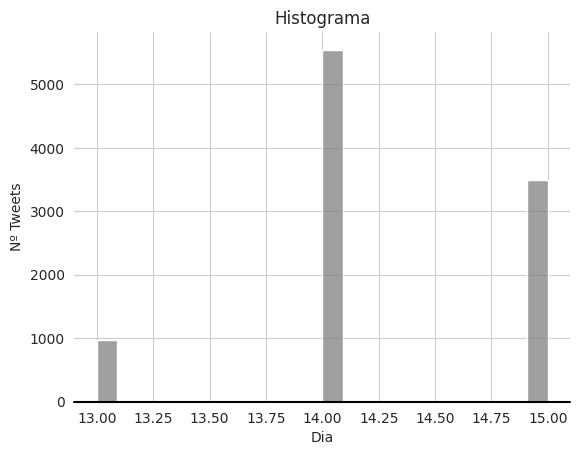

In [14]:
# histograma 

sns.set_style("whitegrid")

ax = sns.histplot(data=df_hour, x='tweet_hour', color = 'grey')
plt.ylabel('Nº Tweets')
plt.xlabel('Dia')
plt.title('Histograma')


ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
plt.show()



In [15]:
'''
db = db.sort_values(by='period')
sns.set_style('whitegrid')
axis = sns.histplot(data=db, x= 'period')
axis.set(frame_on=False)
axis.axhline(0, color='k', clip_on=False)
plt.xlabel('Period of the day')
plt.ylabel('Number of tweets')
plt.title('Tweets per period of the day')
plt.show()
'''

"\ndb = db.sort_values(by='period')\nsns.set_style('whitegrid')\naxis = sns.histplot(data=db, x= 'period')\naxis.set(frame_on=False)\naxis.axhline(0, color='k', clip_on=False)\nplt.xlabel('Period of the day')\nplt.ylabel('Number of tweets')\nplt.title('Tweets per period of the day')\nplt.show()\n"

In [16]:
'''
sns.set_style('whitegrid')
axis = sns.countplot(data=db, y='period', hue='sentiment', order = lista_ord)
                   
axis.set(frame_on=False)
axis.axvline(0, color='k', clip_on=False)
plt.ylabel('Period')
plt.xlabel('Number of tweets')
plt.title('Tweets per period of the day according to sentiment')
plt.legend(fontsize='9.5')
plt.show()
'''

"\nsns.set_style('whitegrid')\naxis = sns.countplot(data=db, y='period', hue='sentiment', order = lista_ord)\n                   \naxis.set(frame_on=False)\naxis.axvline(0, color='k', clip_on=False)\nplt.ylabel('Period')\nplt.xlabel('Number of tweets')\nplt.title('Tweets per period of the day according to sentiment')\nplt.legend(fontsize='9.5')\nplt.show()\n"